In [16]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pprint
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from graphviz import Source
from sklearn.tree import export_graphviz

In [2]:
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [4]:
params = {'max_depth':[2,4,7,10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [6]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00766511, 0.01204557, 0.01589699, 0.02152762]),
    'mean_score_time': array([0.00219131, 0.00207825, 0.00158343, 0.00182743]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.7251732

In [7]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [8]:
gridsearch.best_score_

0.6888004974240539

In [9]:
gridsearch.best_params_

{'max_depth': 2}

In [11]:
estimators = [('scaler', StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [12]:
param_grid = [ {'clf__max_depth':[2,4,7,10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [13]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [14]:
GridSearch.best_score_

0.6888004974240539

In [15]:
GridSearch.cv_results_

{'mean_fit_time': array([0.00788193, 0.01187468, 0.01718507, 0.02239051]),
 'std_fit_time': array([0.00078106, 0.00045735, 0.00071329, 0.00127853]),
 'mean_score_time': array([0.0018136 , 0.00197344, 0.00169492, 0.00163937]),
 'std_score_time': array([0.00013656, 0.0002164 , 0.00012514, 0.00016265]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
 'split1_test_score': array([0.68846154, 0.63153846, 0.60461538, 0.60230769]),
 'split2_test_score': array([0.71439569, 0.72363356, 0.68206313, 0.66589684]),
 'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
 'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
 'mean_test_score': array([0.688

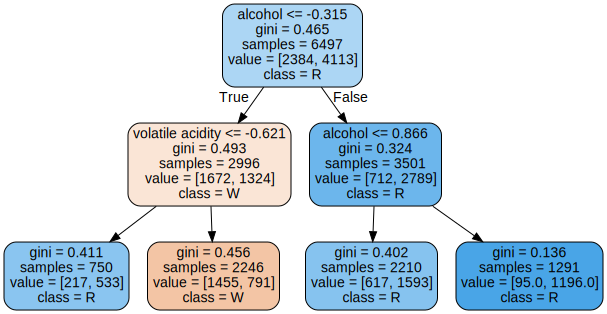

In [17]:
Source(export_graphviz(GridSearch.best_estimator_['clf'], feature_names=X.columns,
                       class_names=['W', 'R'],
                       rounded=True, filled=True))

In [18]:
score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 10},4,0.644016,0.076915
